#### Project: Investigate a Dataset - [TMDb Dataset]
Table of Contents

Introduction

Data Wrangling

Exploratory Data Analysis

Conclusions

## Introduction

### Dataset Description
#### The dataset is collected from a movie database which is a dataset was originally cleaned from kaggle. This dataset contains about 10,000 movies collected from the movie database. The dataset contains 10,866 rows and 21 columns.
 1   id:  this is a unique identifier for each movie
 2   imdb_id; unique identifier for each movie on the imdb            
 3   popularity; numeric quantity specifying the movie's popularity
 4   budget; tells the movie for each movie
 5   revenue; tells how much each movie generated             
 6   original_title; original title before adaptation or translation         
 7   cast; lists the casts in each movie                 
 8   homepage; is a link to the homepage of the movie           
 9   director; tells the director of each movie             
 10   tagline;  the movie's tagline       
 11  keywords; keywords related to the moviefound       
 12  overview; a summary of the movie           
 13  runtime; the duration of the movie in minutes 
 14  genres; the genre of the movie example action, comedy,thriller etc.
 15  production_companies; the production house  
 16  release_date; the date the movie was released        
 17  vote_count; number of vote ratings the movie received             
 18  vote_average; average of the vote count      
 19  release_year; the year the movie was released      
 20 budget_adj; tells the budget of the associated movie           
 21  revenue_adj; tells the revenue of the associated movie       


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df =pd.read_csv('tmdb-movies.csv')
df.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.985763,28.419936,13.112507,11.173104,9.335014
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###Data Cleaning

Deleting columns that are not required.

Checking and droping Null and zero values.

Checking and Removing duplicates.

Changing the format of release date into DateTime format.

Handling columns with pipes

Checking datatype of columns

In [57]:
#drop columns that are not required

df.drop(['imdb_id', 'tagline', 'keywords', 'overview', 'homepage'], axis =1, inplace = True)

In [58]:
#Checking for new number of columns

df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


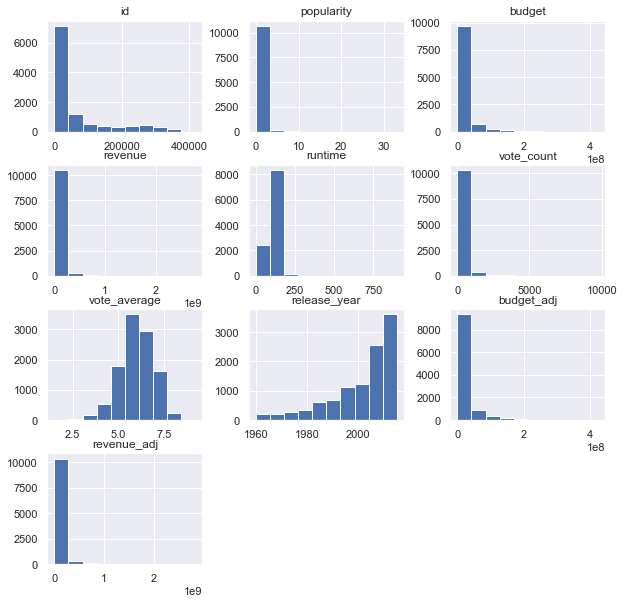

In [59]:
#Look at the dataframe for each column

df.hist(figsize=(10,10));

In [60]:
#Checking revenue, budget and runtime column rows for Zero values

zero_values= df.query('revenue==0 or budget == 0 or runtime ==0 or budget_adj ==0 or revenue_adj ==0').head()
zero_values.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04


In [61]:
#replacing the zero values with NAN.

df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

In [62]:
#Checking for null values
df.isna().any()

id                      False
popularity              False
budget                   True
revenue                  True
original_title          False
cast                     True
director                 True
runtime                  True
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj               True
revenue_adj              True
dtype: bool

In [63]:
#Drop null values
df.dropna(inplace = True)

#check for any null left
df.isna().sum().sum()

0

In [64]:
#Checking for duplicates

sum(df.duplicated())

1

In [65]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [66]:
import locale

In [67]:
#Changing format of release_date to datetime format

df['release_date'] = pd.to_datetime(df['release_date'])

In [68]:
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Question(s) for Analysis
 Here are the questions I'll be answering from the dataset in the course of this analysis

A: Which Director has produced the highest number of movies?

B: What is the most watched genre?

C: What are the top 3 production companies with the most movies?

D: How has the number of movies produced changed over the years?

E: What are the top 10 most profitable and least profitable movies?

Separating columns with pipe characters into different columns

Columns such as cast, director, genres and production_companies

In [69]:
#creating new dataframes to hold the separated columns

df_c = (df['cast'].str.split('|', expand= True).rename(columns= lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand= True).rename(columns= lambda x: f"director_{x+1}"))
df_g = (df['genres'].str.split('|', expand= True).rename(columns= lambda x: f"genres{x+1}"))
df_p = (df['production_companies'].str.split('|', expand= True).rename(columns= lambda x: f"production_companies{x+1}"))

df_c.head(2)
df_p.head(2)

,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


In [70]:
#joining the dataframes back to original dataset

df = df.join([df_c, df_d, df_g, df_p])

In [71]:
#droping the original columns that were separated

df = df.drop(['cast', 'director', 'genres', 'production_companies'],axis = 1)

In [72]:
#checking new df shape

df.shape

(3805, 39)

In [73]:
#checking the dataset

df.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
popularity,32.985763,28.419936,13.112507,11.173104,9.335014
budget,150000000.0,150000000.0,110000000.0,200000000.0,190000000.0
revenue,1513528810.0,378436354.0,295238201.0,2068178225.0,1506249360.0
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
runtime,124.0,120.0,119.0,136.0,137.0
release_date,2015-06-09 00:00:00,2015-05-13 00:00:00,2015-03-18 00:00:00,2015-12-15 00:00:00,2015-04-01 00:00:00
vote_count,5562,6185,2480,5292,2947
vote_average,6.5,7.1,6.3,7.5,7.3
release_year,2015,2015,2015,2015,2015


In [74]:
info = df_g.value_counts(ascending = False)
info

genres1    genres2    genres3  genres4   genres5 
Action     Crime      Drama    Mystery   Thriller    6
Adventure  Animation  Comedy   Family    Fantasy     5
Action     Adventure  Comedy   Crime     Thriller    4
Adventure  Action     Comedy   Thriller  Crime       4
Action     Adventure  Crime    Drama     Thriller    4
                                                    ..
Adventure  Comedy     Western  Romance   Thriller    1
           Crime      Drama    Mystery   Western     1
           Drama      Action   Romance   Family      1
                      Fantasy  Family    Mystery     1
Western    Animation  Family   Comedy    Music       1
Length: 206, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3805 non-null   int64         
 1   popularity             3805 non-null   float64       
 2   budget                 3805 non-null   float64       
 3   revenue                3805 non-null   float64       
 4   original_title         3805 non-null   object        
 5   runtime                3805 non-null   float64       
 6   release_date           3805 non-null   datetime64[ns]
 7   vote_count             3805 non-null   int64         
 8   vote_average           3805 non-null   float64       
 9   release_year           3805 non-null   int64         
 10  budget_adj             3805 non-null   float64       
 11  revenue_adj            3805 non-null   float64       
 12  cast_1                 3805 non-null   object        
 13  ca

In [76]:
#Concatenating all the separated columns into a single column and dropping the nan values

df['casts'] = df[df.columns[12:17]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['directors'] = df[df.columns[17:29]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['genres'] = df[df.columns[29:34]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['production_companies'] = df[df.columns[34:39]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
#dropping the multiple columns
df.drop(df.iloc[:, 12:39],inplace= True,  axis = 1)
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda..."


In [77]:
#copying the dataframe into a new one

dftmdb=df.copy()
dftmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3805 non-null   int64         
 1   popularity            3805 non-null   float64       
 2   budget                3805 non-null   float64       
 3   revenue               3805 non-null   float64       
 4   original_title        3805 non-null   object        
 5   runtime               3805 non-null   float64       
 6   release_date          3805 non-null   datetime64[ns]
 7   vote_count            3805 non-null   int64         
 8   vote_average          3805 non-null   float64       
 9   release_year          3805 non-null   int64         
 10  budget_adj            3805 non-null   float64       
 11  revenue_adj           3805 non-null   float64       
 12  casts                 3805 non-null   object        
 13  directors        

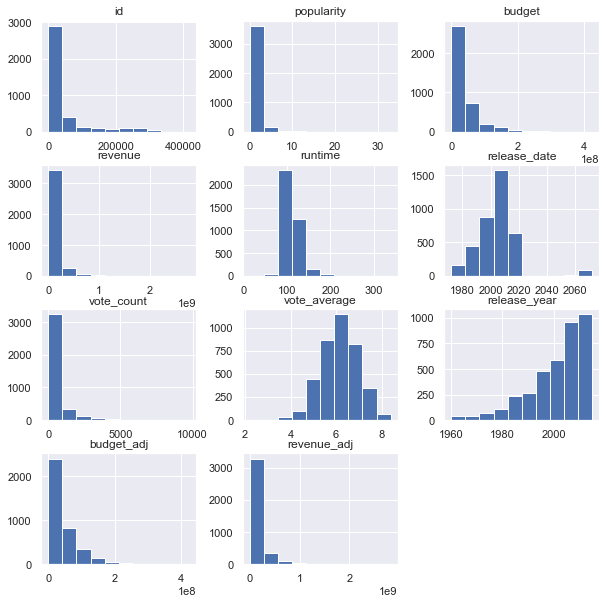

In [78]:
#Checking the frequency distribution of the new dataframe
 
dftmdb.hist(figsize=(10,10));

EXPLORATORY DATA ANALYSIS

Question 1: Which Director has produced the highest number of movies?

In [79]:
#Which Director produced the highest number of movies?
 
directors = dftmdb['directors'].value_counts()
directors = directors.head(10)
directors.head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Oliver Stone         15
Renny Harlin         15
Brian De Palma       15
Name: directors, dtype: int64

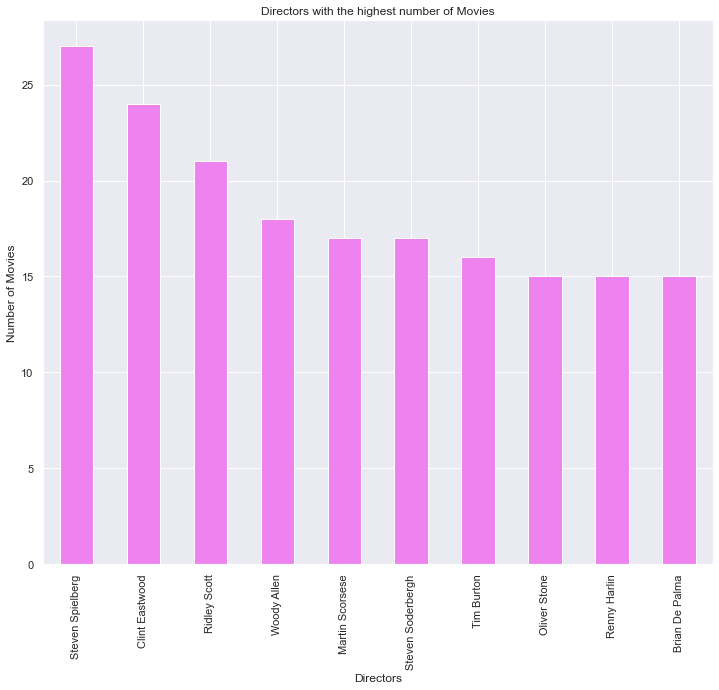

In [80]:
#Visualizing Which Director has produced the highest number of movies?

dftmdb['directors'].value_counts().head(10).plot.bar(figsize=(12,10), color = 'violet',
 title = 'Directors with the highest number of Movies')
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.show()

Question 2: What is the most watched genre?

In [81]:
#What is the most watched genre?

genres = dftmdb['genres'].value_counts()
genres = genres.head(10)
genres.head(10)

Drama                   243
Comedy                  230
Drama,Romance           106
Comedy,Romance          103
Comedy,Drama,Romance     87
Comedy,Drama             85
Horror,Thriller          80
Horror                   57
Drama,Thriller           47
Action,Thriller          39
Name: genres, dtype: int64

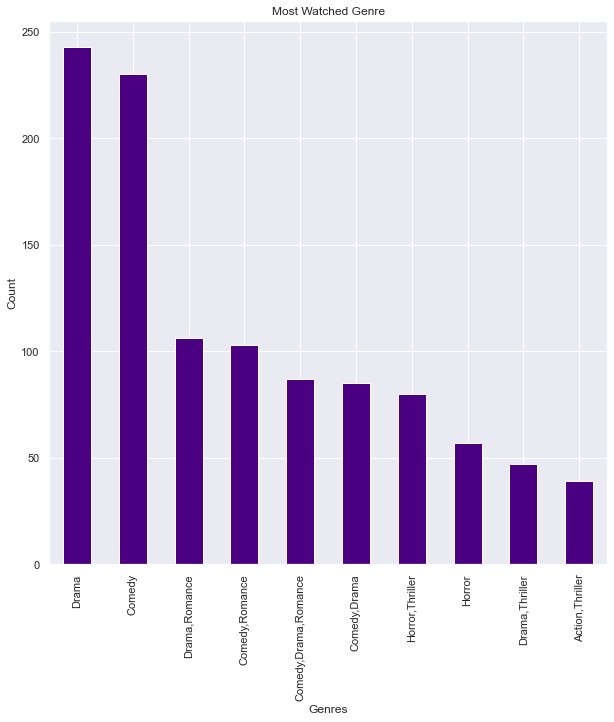

In [82]:
#Visualizing what is the most watched genre?

df['genres'].value_counts().head(10).plot.bar(figsize=(10,10), color = 'indigo', title ='Most Watched Genre')
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

Question 3: What are the top 3 production companies with the most movies?

In [83]:
dftmdb.groupby('production_companies').size()

production_companies
10th Hole Productions,Benaroya Pictures,Four of a Kind Productions                                  1
120dB Films,Scion Films,Voodoo Production Services,Chydzik Media Group,First Wedding Productions    1
1492 Pictures,Dune Entertainment,Fox 2000 Pictures,Sunswept Entertainment,Dune Entertainment III    1
1492 Pictures,Warner Bros.,Heyday Films                                                             1
1492 Pictures,Warner Bros.,Heyday Films,MIRACLE Productions GmbH & Co. KG                           1
                                                                                                   ..
area japan                                                                                          1
chateau productions                                                                                 1
erbp                                                                                                1
iDeal Partners Film Fund                                     

In [84]:
#What are the top 3 production companies with the most movies

production_companies = dftmdb['production_companies'].value_counts()
production_companies = production_companies.head(10)
production_companies.head(3)

Paramount Pictures    77
Universal Pictures    57
Columbia Pictures     39
Name: production_companies, dtype: int64

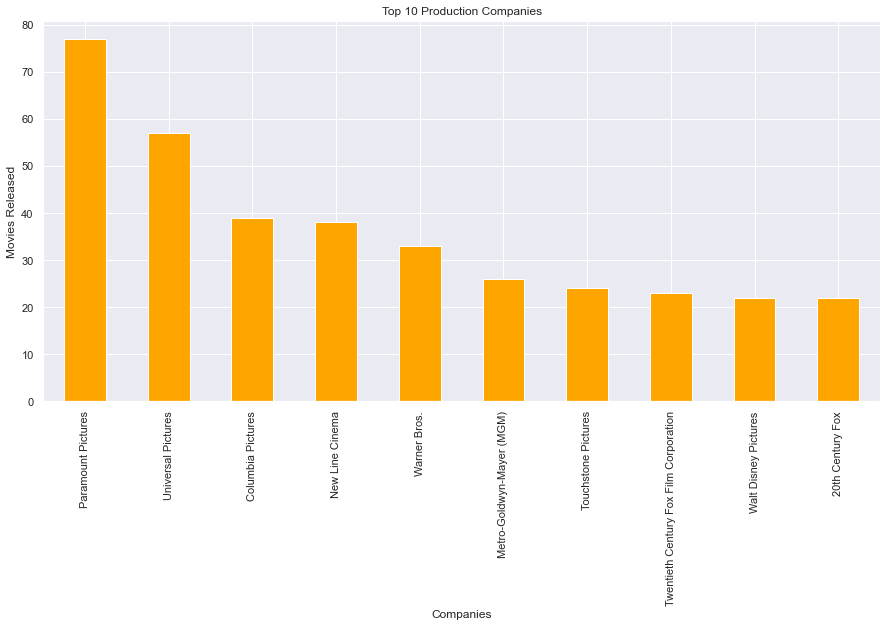

In [85]:
#Visualizing the top 10 production companies
 
df['production_companies'].value_counts().head(10).plot.bar(figsize=(15,7), color = 'orange', 
title ='Top 10 Production Companies')
plt.xlabel("Companies")
plt.ylabel("Movies Released")
plt.show()

Question 4: How has the number of movies produced changed over the years?

In [86]:
#Which year had the highest number of movies released?

movies_year = dftmdb.groupby('release_year').id.count()
movies_year

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     47
1987     46
1988     56
1989     51
1990     52
1991     50
1992     53
1993     72
1994     61
1995     79
1996     84
1997     90
1998     90
1999    116
2000    104
2001    118
2002    125
2003    121
2004    142
2005    159
2006    168
2007    159
2008    161
2009    170
2010    177
2011    196
2012    157
2013    179
2014    165
2015    160
Name: id, dtype: int64

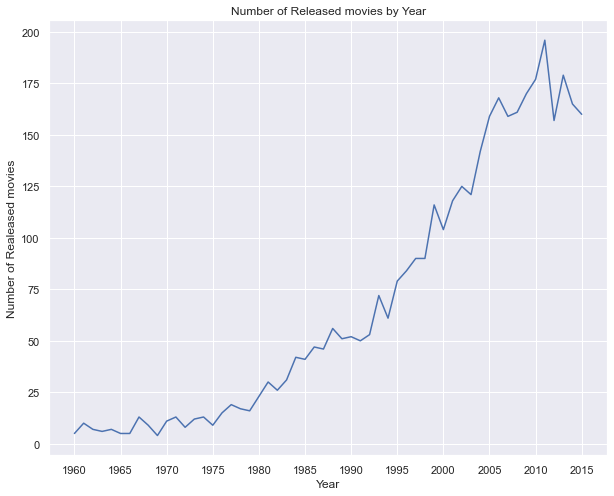

In [87]:
#Using a line graph to visualize how the number of movies produced has increased over the years.

movies_year.plot(kind = 'line', figsize= (10,8),xticks = np.arange(1960,2016,5))
plt.title('Number of Released movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Realeased movies');

Question 5: What are the top 10 most profitable and least profitable movies?

In [88]:
#Creating a new column called profit

dftmdb['profit']= dftmdb['revenue'] - dftmdb['budget']
dftmdb.head(5)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago...",1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ...",1.316249e+09


In [89]:
#Sorting the profit column into descending order

profit_dftmdb = pd.DataFrame(dftmdb['profit'].sort_values(ascending = False))

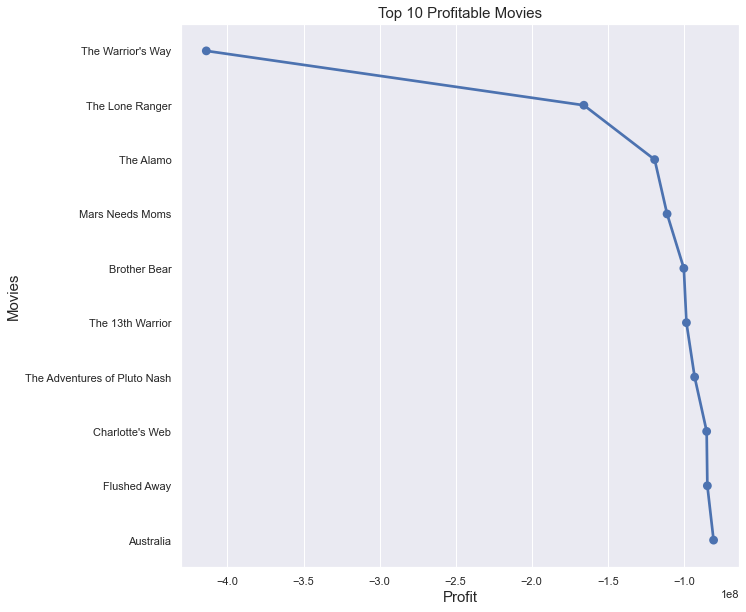

In [93]:
#Using a line plot to show the top 10 profitable movies

profit_dftmdb['original_title'] = dftmdb['original_title']
x = list(map(str,(profit_dftmdb['original_title'])))
x = list(x[:10])
y = list(profit_dftmdb['profit'][:10])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_ylabel("Movies", fontsize = 15)
ax.set_xlabel("Profit",fontsize = 15);

In [91]:
#Sorting the profit column into ascending order

profit_dftmdb = pd.DataFrame(dftmdb['profit'].sort_values(ascending = True))

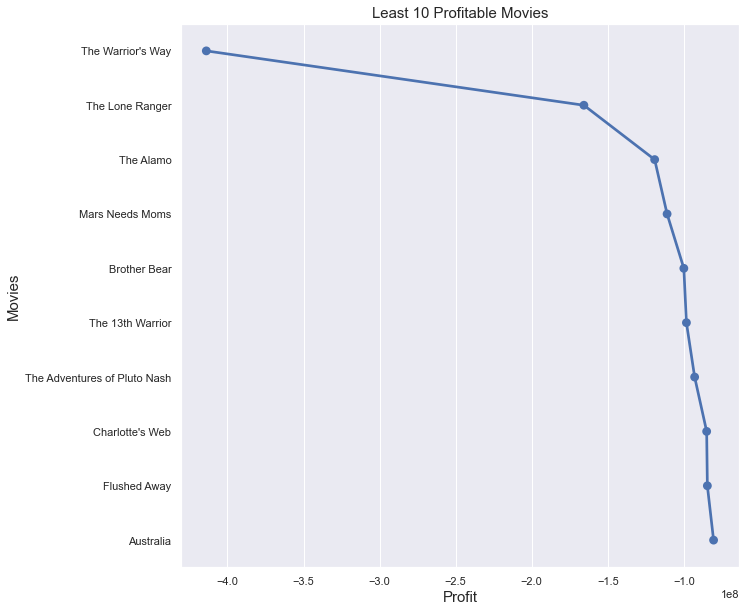

In [92]:
#Using a lineplot to show 10 least profitable movie

profit_dftmdb['original_title'] = dftmdb['original_title']
x = list(map(str,(profit_dftmdb['original_title'])))
x = list(x[:10])
y = list(profit_dftmdb['profit'][:10])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Least 10 Profitable Movies",fontsize = 15)
ax.set_ylabel("Movies", fontsize =15)
ax.set_xlabel("Profit",fontsize = 15);

CONCLUSIONS

Below are the conclusions I inferred from my explorative analysis of the tmdb dataset,

The first question showed that Steven Spielberg is the director with the highest number of movies produced with a total of 27 movies produced.

The second question revealed drama as the most watched genre with a total count of 243.

The third question revealed the top 3 production companies to be Paramount Pictures with a total of 77 movies, Universal Pictures with a total of 57 movies and Columbia Pictures with a total of 3 movies.

The fourth question sought to answer how the number of movies produced had progressed over the years and findings showed that the number of movies produced where considerably low between 1960 to 1983 with the year 1969 having only 4 movies produced while the number of movies produced spiked up between the year 2012 to 2015 with year 2013 having 179 movies produced which is the highest number.

The fifth question looked at the top 10 most profitable and least profitable movies. This analysis was done using a point plot line and it showed Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hollows: Part 2, Avengers: Age of Ultron, Frozen, The Net as the top 10 most profitable movies respectively while the least 10 profitable movies are The Warrior's Way, The Lone Rangers, The Alamo, Mars Needs Moms, Brother Bear, The 13th Warrior, The Adventures of Pluto Nash, Charlotte's Web, Flushed Away and Australia respectively.

LIMITATIONS

During the process of this analysis, I experienced certain limitations considering it was my first time carrying out an analysis soley based on the python tool. Also, the dataset was limited as it contained some missing column and missing entries. I had to clean the dataset, drop some columns, delete duplicates, separate the columns with pipe characters and even create some new columns.
Thanks to the various resources available all over the net, I made use of google, stackover, github and had to watch some videos to see how this type of analysis is done. I must also mention that my session lead, Tolu Okuwoga was very helpful and fundamental to the completion of this project as she was available to answer my numerous questions and guide me through where I had glitches.